<a href="https://colab.research.google.com/github/billcc5566/hello-world/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression問題實作**

**專題目標**

在中油煤油月銷量和冬季溫度資料中發現，冬季氣溫越寒冷時，煤油需求量便會大幅攀升，利用之前冬季每月最低溫(°C)和煤油月銷量(KL)資料嘗試尋找兩者之間的關係，用以預測並提早規劃。



## 數據準備
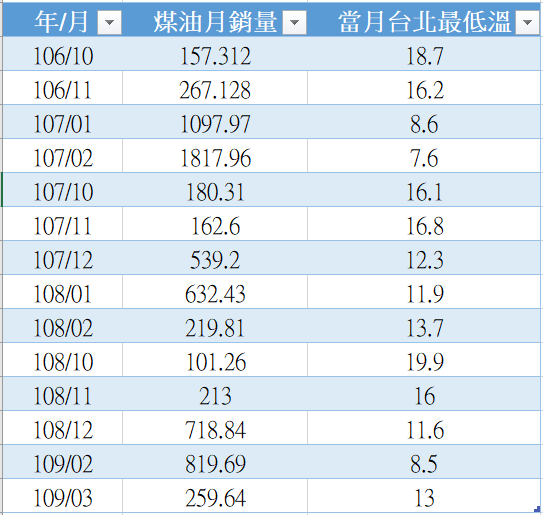

106~109年冬季氣溫與煤油銷量

資料來源-中油內部會計園地與中央氣象局


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [19, 16, 9, 8, 16, 17, 12, 12, 14, 20, 16, 12, 9, 13]
y_data = [157, 267, 1098, 1818, 180, 163, 539, 632, 220, 101, 213, 719, 820, 260]


## 訓練模型

這裡使用最簡單的linear model：y_data=w*x_data+b

我們要用gradient descent把b和w找出来。

1. function set

$$
y=b+wx
 $$

2. Loss function and Gradient

 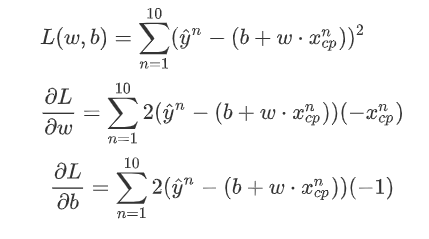

3. 更新參數

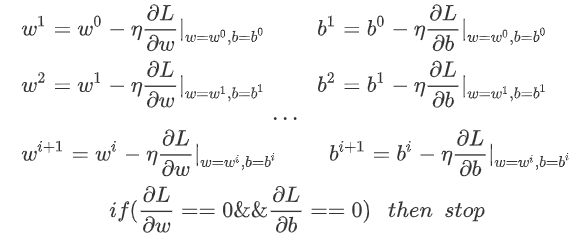
 

the function will be y_data=2026.624554455839+-109.77069306933376*x_data


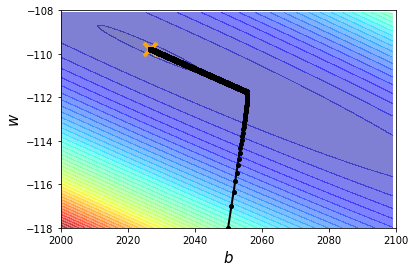

In [ ]:
# ydata=b+w*xdata
x = np.arange(2000, 2100, step=1)
y = np.arange(-118, -108, step=0.1)  # weight
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
  for j in range(len(y)):
    b = x[i]
    w = y[j]
    Z[j][i] = 0
    for n in range(len(x_data)):
      Z[j][i] = Z[j][i] + (y_data[n] - b - w * x_data[n]) ** 2
    Z[j][i] = Z[j][i] / len(x_data)

b = 2050
# initial b
w =-118
# initial w
lr = 1
# lr爲學習速率
iteration = 100000
# iteration爲訓練次數
# b_history和w_history用來存儲訓練過程中更新的w和b
b_history = [b]
w_history = [w]
# Iteration是訓練次數
lr_b = 0
lr_w = 0

for i in range(iteration):
  # 訓練次數爲iteration次
  # w和b的偏導數初始爲0
  b_grad = 0.0
  w_grad = 0.0
  for n in range(len(x_data)):
    # 用輸入的x_data的所有數據計算和更新w、b的偏導數
    b_grad = b_grad - 2.0 * (y_data[n] - b - w * x_data[n]) * 1.0
    w_grad = w_grad - 2.0 * (y_data[n] - b - w * x_data[n]) * x_data[n]
  lr_b = lr_b + b_grad ** 2 
  lr_w = lr_w + w_grad ** 2
  # 更新w和b，用adagrad，累加當前梯度平方和，學習速率再除以累加的根號
  b = b - (lr/np.sqrt(lr_b)) * b_grad
  w = w - (lr/np.sqrt(lr_w)) * w_grad
  # b = b - lr * b_grad
  # w = w - lr * w_grad
  # 每更新一次存儲更新的w和b
  b_history.append(b)
  w_history.append(w)
print("the function will be y_data="+str(b)+"+"+str(w)+"*x_data")

# 顯示圖像
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([2026.6], [-109.77], 'x', markersize=13, markeredgewidth=4, color='orange')
plt.plot(b_history, w_history, 'o-', markersize=4, linewidth=2, color='black')
plt.xlim(2000, 2100)
plt.ylim(-118, -108)

plt.xlabel(r'$b$', fontsize=15)
plt.ylabel(r'$w$', fontsize=15)
plt.show()
